      VIN  VSS  VDD           IDD           ISS  VREF           IIN      VOUT
0    0.00  0.0  3.3  5.700000e-13  3.000000e-14   0.0  2.500000e-13  0.043272
1    0.05  0.0  3.3  1.650000e-12  4.000000e-14   0.0  7.000000e-14  0.054676
2    0.10  0.0  3.3  5.800000e-13  6.000000e-14   0.0  1.100000e-13  0.059462
3    0.15  0.0  3.3 -1.580000e-12  6.000000e-14   0.0 -2.000000e-13  0.064036
4    0.20  0.0  3.3  1.200000e-13  7.000000e-14   0.0 -2.400000e-13  0.068596
..    ...  ...  ...           ...           ...   ...           ...       ...
422  2.80  0.0  3.3  9.129170e-07 -9.127970e-07   1.5  4.000000e-14  1.340182
423  2.85  0.0  3.3  9.146630e-07 -9.151030e-07   1.5  5.000000e-14  1.388314
424  2.90  0.0  3.3  9.168190e-07 -9.165480e-07   1.5 -3.000000e-14  1.436956
425  2.95  0.0  3.3  9.184480e-07 -9.179750e-07   1.5  3.000000e-14  1.485914
426  3.00  0.0  3.3  9.198110e-07 -9.196340e-07   1.5  4.000000e-14  1.534170

[427 rows x 8 columns]


Text(0, 0.5, 'VOUT')

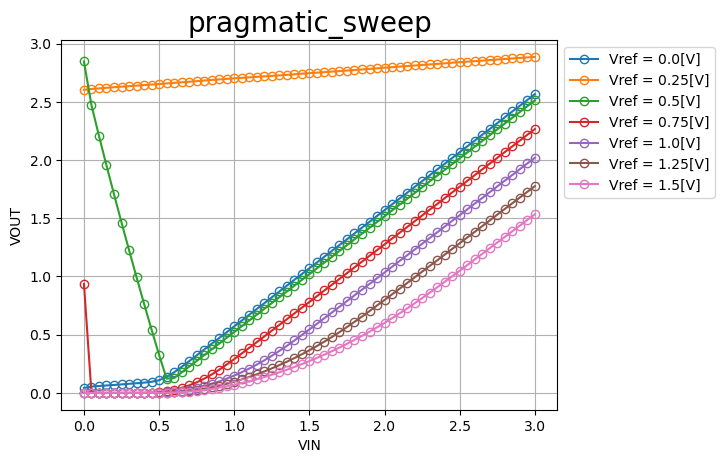

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('260205_PRAGMATIC_STRESS.csv', sep = ',')
print(df)
df.columns

fig, ax = plt.subplots()

group = df.groupby('VREF')

for i, g in group:
    plt.plot(g['VIN'],g['VOUT'],marker = 'o',markerfacecolor = 'none',label = f'Vref = {i}[V]')

ax.set_title('pragmatic_sweep',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('VIN')
ax.set_ylabel('VOUT')


Text(0, 0.5, 'VOUT')

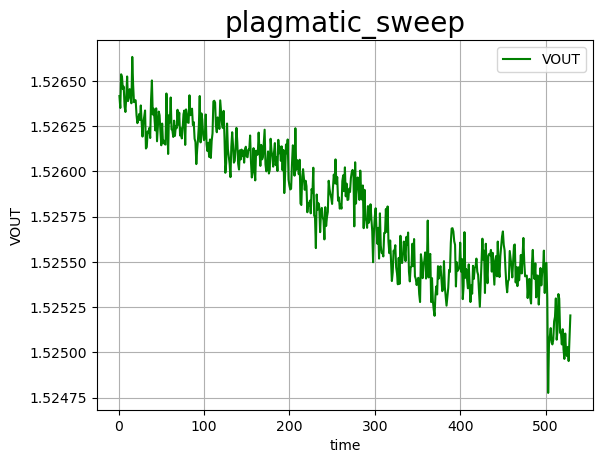

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260205_PRAGMATIC_SAMPLING_1000S.csv', sep = ',')

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.5]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df3['@TIME'],df3['VOUT'],color ='green',label = 'VOUT')

ax.set_title('plagmatic_sweep',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('VOUT')

ax2 = ax.twinx()
ax2.plot(df3['@TIME'], df3['ISS'],color = 'blue',label='ISS')
ax2.set_ylabel('ISS')


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2,bbox_to_anchor=(1,1))


# 기존 데이터
x = df3['@TIME'].to_numpy()
y = df3['VOUT'].to_numpy()

# ===== 선형회귀 =====
a, b = np.polyfit(x, y, 1)   # y = ax + b

# 회귀선 생성
y_fit = a*x + b

# ===== R^2 계산 =====
ss_res = np.sum((y - y_fit)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res/ss_tot)

# ===== 기존 plot 위에 overlay =====
ax.plot(x, y_fit, linewidth=2,color = 'red', label=f'y = {a:.4e}x + {b:.4f}\n$R^2$ = {r2:.4f}')

ax.legend(bbox_to_anchor=(1,1))







Text(0, 0.5, 'VOUT')

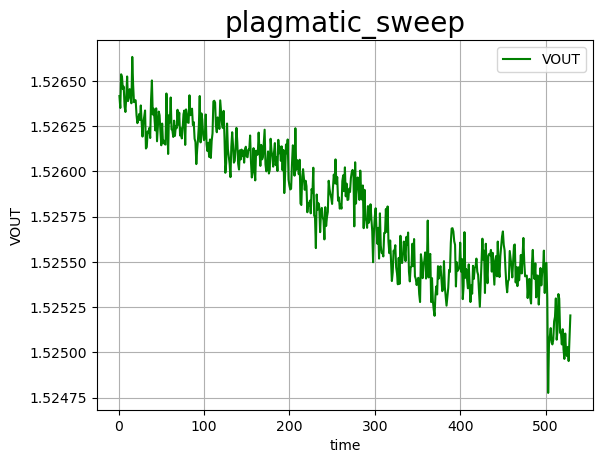

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260205_PRAGMATIC_SAMPLING_1000S.csv', sep = ',')

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.5]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df3['@TIME'],df3['VOUT'],color ='green',label = 'VOUT')

ax.set_title('plagmatic_sweep',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('VOUT')




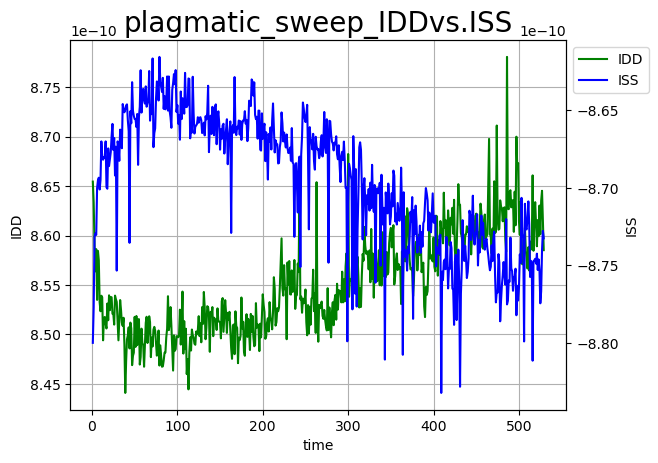

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260205_PRAGMATIC_SAMPLING_1000S.csv', sep = ',')

df['ISUM'] = df['IDD']+df['ISS']

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.5]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df3['@TIME'],df3['IDD'],color ='green',label = 'IDD')

ax.set_title('plagmatic_sweep_IDDvs.ISS',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('IDD')

ax2 = ax.twinx()
ax2.plot(df3['@TIME'], df3['ISS'],color = 'blue',label='ISS')
ax2.set_ylabel('ISS')


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2,bbox_to_anchor=(1,1))

      VIN  VSS  VDD           IDD           ISS  VREF      VOUT          IREF
0    0.00  0.0  3.3  4.829730e-09 -4.860540e-09   0.0  0.048646  2.000000e-13
1    0.05  0.0  3.3  6.430000e-09 -6.444670e-09   0.0  0.079328 -1.000000e-13
2    0.10  0.0  3.3  7.162160e-09 -7.170790e-09   0.0  0.122742  1.000000e-13
3    0.15  0.0  3.3  7.385640e-09 -7.396920e-09   0.0  0.178624  4.000000e-14
4    0.20  0.0  3.3  7.459070e-09 -7.475340e-09   0.0  0.228410  2.000000e-14
..    ...  ...  ...           ...           ...   ...       ...           ...
422  2.80  0.0  3.3  9.248040e-06 -9.248780e-06   1.5  1.350682  3.000000e-13
423  2.85  0.0  3.3  9.275400e-06 -9.275830e-06   1.5  1.398146 -1.000000e-13
424  2.90  0.0  3.3  9.296520e-06 -9.296840e-06   1.5  1.446854  1.900000e-13
425  2.95  0.0  3.3  9.312810e-06 -9.313390e-06   1.5  1.495686 -1.500000e-13
426  3.00  0.0  3.3  9.324920e-06 -9.325320e-06   1.5  1.544166  1.300000e-13

[427 rows x 8 columns]


Text(0, 0.5, 'VOUT')

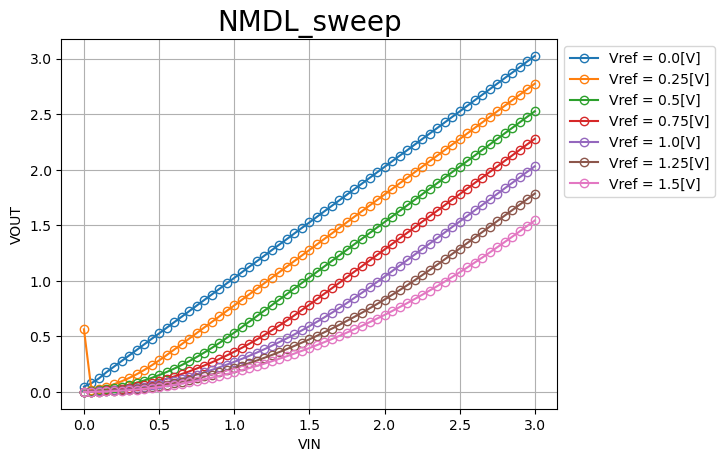

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('260205_NMDL_STRESS.csv', sep = ',')
print(df)
df.columns

fig, ax = plt.subplots()

group = df.groupby('VREF')

for i, g in group:
    plt.plot(g['VIN'],g['VOUT'],marker = 'o',markerfacecolor = 'none',label = f'Vref = {i}[V]')

ax.set_title('NMDL_sweep',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('VIN')
ax.set_ylabel('VOUT')


Text(0, 0.5, 'VOUT')

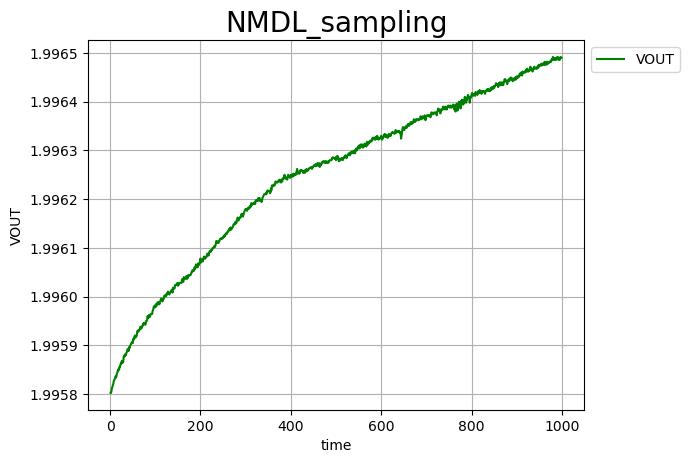

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260205_NMDL_SAMPLING_1000S.csv', sep = ',')

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.9954]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df2['@TIME'],df2['VOUT'],color = 'green',label = 'VOUT')

ax.set_title('NMDL_sampling',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('VOUT')

ax2 = ax.twinx()
ax2.plot(df2['@TIME'], df2['IDD'],color = 'blue',label='IDD')
ax2.set_ylabel('IDD')


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2,bbox_to_anchor=(1,1))

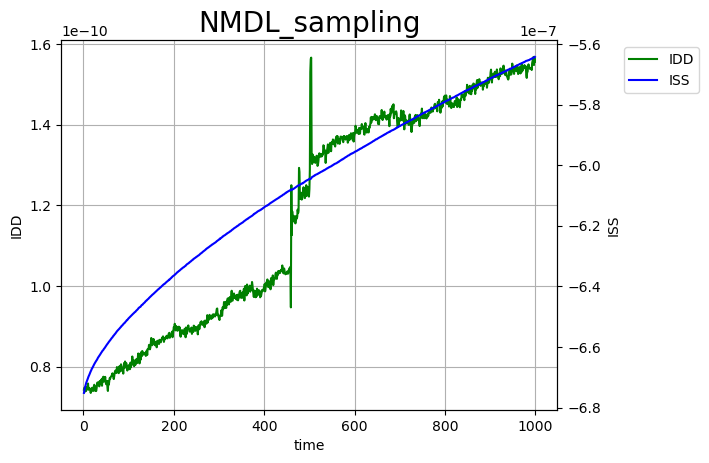

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260205_NMDL_SAMPLING_1000S.csv', sep = ',')

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.9954]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df2['@TIME'],df2['IDD'],color = 'green',label = 'IDD')

ax.set_title('NMDL_sampling',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('IDD')

ax2 = ax.twinx()
ax2.plot(df2['@TIME'], df2['ISS'],color = 'blue',label='ISS')
ax2.set_ylabel('ISS')


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2,bbox_to_anchor=(1.3,1))

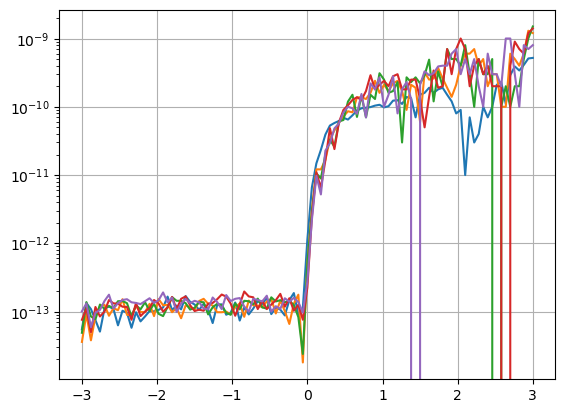

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'I_V Sweep - Unit (transfer) [251203_ALD_#5_R00(5) ; 1_16_2026 10_37_16 AM].csv'

with open(path, 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for j, line in enumerate(lines):
        if line.__contains__('DataValue')== True:
            head = j - 1
            break

df = pd.read_csv(path, sep = ',', skiprows = head)

df.columns = df.columns.str.strip()
df = df.iloc[:,1:]

df['ID+IS'] = df['ID']+df['IS']
df['ID+IS'] = df['ID+IS'].abs()
df['IG'] = df['IG'].abs()


fig, ax = plt.subplots()
group = df.groupby('VD')

for i, g in group:
    plt.semilogy(g['VG'],g['ID+IS'], label = i)

ax.grid(True)


Vth @ log10(|ID|) = -10 (by VD)
VD=0.1: Vth=0.3841288184437882
VD=0.9: Vth=0.38493045419284794
VD=1.7: Vth=0.38471180597211074
VD=2.5: Vth=0.3846635762232989
VD=3.3: Vth=0.3848838446065985
SS (mV/dec) using log10(|ID|)=-10 to -9 (by VD)
VD=0.1: SS=90.61220717523133
VD=0.9: SS=87.5289097988785
VD=1.7: SS=87.28080877177108
VD=2.5: SS=87.29438509999294
VD=3.3: SS=87.1447016128667


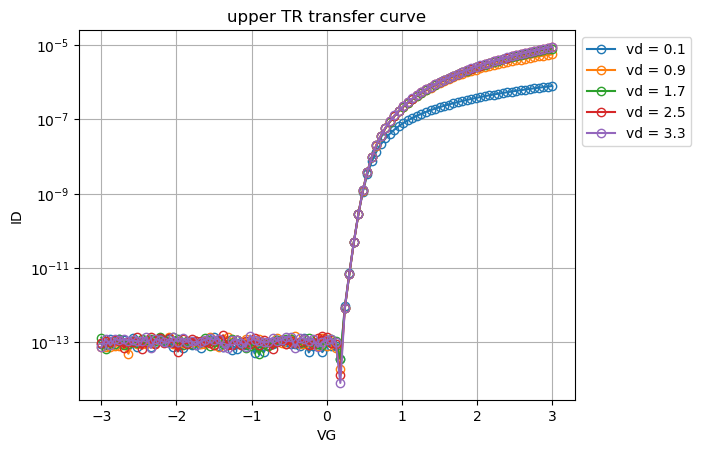

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path1 = 'I_V Sweep - Unit (transfer) [lower_tr(4) ; 2_5_2026 11_32_31 AM].csv'
path2 = 'I_V Sweep - Unit (transfer) [upper_tr(3) ; 2_5_2026 11_28_33 AM].csv'

with open(path2, 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for j, line in enumerate(lines):
        if line.__contains__('DataValue')== True:
            head = j - 1
            break

df = pd.read_csv(path2, sep = ',', skiprows = head)

df.columns = df.columns.str.strip()
df['ID'] = df['ID'].abs()
df['VD'] = df['VD'].round(3)

fig, ax = plt.subplots()
group = df.groupby('VD')

for i, g in group:
    plt.semilogy(g['VG'],g['ID'],marker = 'o', markerfacecolor = 'none',label = f'vd = {i}')

ax.grid(True)
ax.set_xlabel('VG')
ax.set_ylabel('ID')
ax.legend(bbox_to_anchor = (1,1))
ax.set_title('upper TR transfer curve')

target1 = -10                               # log(ID) = -10이 타겟임(vth 산출용)
target2 = -9                                # SS 산출용
vth_by_vd_10 = {}  # VD별 Vth 저장
vth_by_vd_9 = {}  # VD별 Vth 저장
for vd, g in df.groupby('VD'):              # 앞에 있는 vd는 df.groupby('VD')의 key인 'VD'를 받는것이고 뒤에 있는 g는 key 'VD'에 해당하는 값을 받는다.
    g = g.sort_values('ID')

    VG = g['VG'].to_numpy()                 # VG column을 숫자로 변환
    ID = g['ID'].to_numpy()                 # ID column을 숫자로 변환

    # log10(|ID|) 계산: 0은 로그 불가 → 아주 작은 값으로 클리핑
    absID = np.abs(ID)
    absID = np.clip(absID, 1e-300, None)   # underflow 방지
    logI = np.log10(absID)

     # ===== 3) target 교차 구간 탐색 + 선형 보간 =====
    diff1 = logI - target1
    diff2 = logI - target2
    cross_idx_10 = np.where(diff1[:-1] * diff1[1:] <= 0)[0]  # target을 사이에 두는 인접 점(★★★★★★★★★★★★ np.where(condition,True,False))
    cross_idx_9 = np.where(diff2[:-1] * diff2[1:] <= 0)[0] 

    if len(cross_idx_10) == 0:
        vth_by_vd_10[vd] = np.nan
        continue
    if len(cross_idx_9) == 0:
        vth_by_vd_9[vd] = np.nan
        continue
    # 첫 번째 crossing 사용 (원하면 마지막 crossing: cross_idx[-1])
    i1 = cross_idx_10[0]
    i2 = cross_idx_9[0]

    x0, x1 = VG[i1], VG[i1+1]
    y0, y1 = logI[i1], logI[i1+1]

    z0, z1 = VG[i2], VG[i2+1]
    t0, t1 = logI[i2], logI[i2+1]    

    # 분모 0 방지
    if y1 == y0:
        vth_10 = np.nan
    else:
        vth_10 = x0 + (target1 - y0) * (x1 - x0) / (y1 - y0)

    vth_by_vd_10[vd] = vth_10
    
    # 분모 0 방지
    if t1 == t0:
        vth_9 = np.nan
    else:
        vth_9 = z0 + (target2 - t0) * (z1 - z0) / (t1 - t0)

    vth_by_vd_9[vd] = vth_9
    
# ===== 5) VD별 Vth 출력 =====
print(f"Vth @ log10(|ID|) = {target1} (by VD)")
for vd in sorted(vth_by_vd_10.keys()):
    print(f"VD={vd}: Vth={vth_by_vd_10[vd]}")

    # ===== 6) VD별 SS 계산 =====
ss_by_vd = {}  # VD별 SS 저장 (mV/dec)

for vd in vth_by_vd_10.keys():
    vg_at_10 = vth_by_vd_10.get(vd, np.nan)  # log|ID|=-10에서 VG
    vg_at_9  = vth_by_vd_9.get(vd, np.nan)   # log|ID|=-9에서 VG

    # 둘 중 하나라도 NaN이면 SS도 NaN
    if np.isnan(vg_at_10) or np.isnan(vg_at_9):
        ss_by_vd[vd] = np.nan
    else:
        ss_v_per_dec = (vg_at_9 - vg_at_10) / (target2 - target1)  # 여기서는 /1이라 동일하지만 일반식으로 작성
        ss_by_vd[vd] = ss_v_per_dec * 1000  # mV/dec

# ===== 7) VD별 SS 출력 =====
print(f"SS (mV/dec) using log10(|ID|)={target1} to {target2} (by VD)")
for vd in sorted(ss_by_vd.keys()):
    print(f"VD={vd}: SS={ss_by_vd[vd]}")



Vth @ log10(|ID|) = -10 (by VD)
VD=0.1: Vth=0.16420429247037407
VD=1.5: Vth=0.19168285562802978
VD=2.9: Vth=0.19713388129837245
SS (mV/dec) using log10(|ID|)=-10 to -9 (by VD)
VD=0.1: SS=90.43381873594694
VD=1.5: SS=86.0886496354345
VD=2.9: SS=85.33406077017585


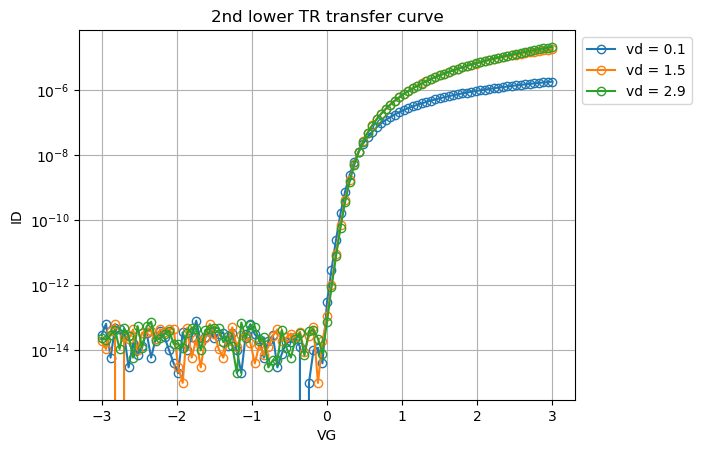

In [13]:
### NMDL sf transfer curve 1st measurement


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '260206_I_V Sweep - Unit (transfer) [260206_ALD_IGZO_#6_WL_1010_R02_lower_TR_2nd(2) ; 2_6_2026 1_54_35 PM].csv'

with open(path, 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for j, line in enumerate(lines):
        if line.__contains__('DataValue')== True:
            head = j - 1
            break

df = pd.read_csv(path, sep = ',', skiprows = head)

df.columns = df.columns.str.strip()
df['ID'] = df['ID'].abs()
df['VD'] = df['VD'].round(3)

fig, ax = plt.subplots()
group = df.groupby('VD')

for i, g in group:
    plt.semilogy(g['VG'],g['ID'],marker = 'o', markerfacecolor = 'none',label = f'vd = {i}')

ax.grid(True)
ax.set_xlabel('VG')
ax.set_ylabel('ID')
ax.legend(bbox_to_anchor = (1,1))
ax.set_title('2nd lower TR transfer curve')

target1 = -10                               # log(ID) = -10이 타겟임(vth 산출용)
target2 = -9                                # SS 산출용
vth_by_vd_10 = {}  # VD별 Vth 저장
vth_by_vd_9 = {}  # VD별 Vth 저장
for vd, g in df.groupby('VD'):              # 앞에 있는 vd는 df.groupby('VD')의 key인 'VD'를 받는것이고 뒤에 있는 g는 key 'VD'에 해당하는 값을 받는다.
    g = g.sort_values('ID')

    VG = g['VG'].to_numpy()                 # VG column을 숫자로 변환
    ID = g['ID'].to_numpy()                 # ID column을 숫자로 변환

    # log10(|ID|) 계산: 0은 로그 불가 → 아주 작은 값으로 클리핑
    absID = np.abs(ID)
    absID = np.clip(absID, 1e-300, None)   # underflow 방지
    logI = np.log10(absID)

     # ===== 3) target 교차 구간 탐색 + 선형 보간 =====
    diff1 = logI - target1
    diff2 = logI - target2
    cross_idx_10 = np.where(diff1[:-1] * diff1[1:] <= 0)[0]  # target을 사이에 두는 인접 점(★★★★★★★★★★★★ np.where(condition,True,False))
    cross_idx_9 = np.where(diff2[:-1] * diff2[1:] <= 0)[0] 

    if len(cross_idx_10) == 0:
        vth_by_vd_10[vd] = np.nan
        continue
    if len(cross_idx_9) == 0:
        vth_by_vd_9[vd] = np.nan
        continue
    # 첫 번째 crossing 사용 (원하면 마지막 crossing: cross_idx[-1])
    i1 = cross_idx_10[0]
    i2 = cross_idx_9[0]

    x0, x1 = VG[i1], VG[i1+1]
    y0, y1 = logI[i1], logI[i1+1]

    z0, z1 = VG[i2], VG[i2+1]
    t0, t1 = logI[i2], logI[i2+1]    

    # 분모 0 방지
    if y1 == y0:
        vth_10 = np.nan
    else:
        vth_10 = x0 + (target1 - y0) * (x1 - x0) / (y1 - y0)

    vth_by_vd_10[vd] = vth_10
    
    # 분모 0 방지
    if t1 == t0:
        vth_9 = np.nan
    else:
        vth_9 = z0 + (target2 - t0) * (z1 - z0) / (t1 - t0)

    vth_by_vd_9[vd] = vth_9
    
# ===== 5) VD별 Vth 출력 =====
print(f"Vth @ log10(|ID|) = {target1} (by VD)")
for vd in sorted(vth_by_vd_10.keys()):
    print(f"VD={vd}: Vth={vth_by_vd_10[vd]}")

    # ===== 6) VD별 SS 계산 =====
ss_by_vd = {}  # VD별 SS 저장 (mV/dec)

for vd in vth_by_vd_10.keys():
    vg_at_10 = vth_by_vd_10.get(vd, np.nan)  # log|ID|=-10에서 VG
    vg_at_9  = vth_by_vd_9.get(vd, np.nan)   # log|ID|=-9에서 VG

    # 둘 중 하나라도 NaN이면 SS도 NaN
    if np.isnan(vg_at_10) or np.isnan(vg_at_9):
        ss_by_vd[vd] = np.nan
    else:
        ss_v_per_dec = (vg_at_9 - vg_at_10) / (target2 - target1)  # 여기서는 /1이라 동일하지만 일반식으로 작성
        ss_by_vd[vd] = ss_v_per_dec * 1000  # mV/dec

# ===== 7) VD별 SS 출력 =====
print(f"SS (mV/dec) using log10(|ID|)={target1} to {target2} (by VD)")
for vd in sorted(ss_by_vd.keys()):
    print(f"VD={vd}: SS={ss_by_vd[vd]}")




Text(0, 0.5, 'VOUT')

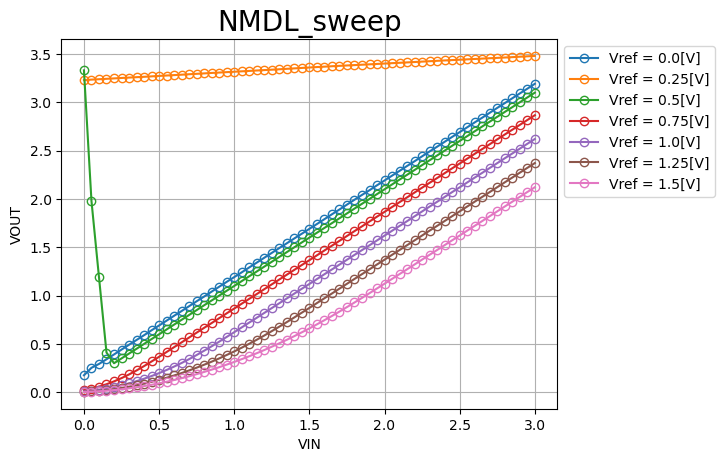

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '260206_NMDL_#6_WL_1010_R02_SWEEP_02.csv'

df = pd.read_csv(path, sep = ',')

fig, ax = plt.subplots()

group = df.groupby('VREF')

for i, g in group:
    plt.plot(g['VIN'],g['VOUT'],marker = 'o',markerfacecolor = 'none',label = f'Vref = {i}[V]')

ax.set_title('NMDL_sweep',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('VIN')
ax.set_ylabel('VOUT')


Text(0, 0.5, 'VOUT')

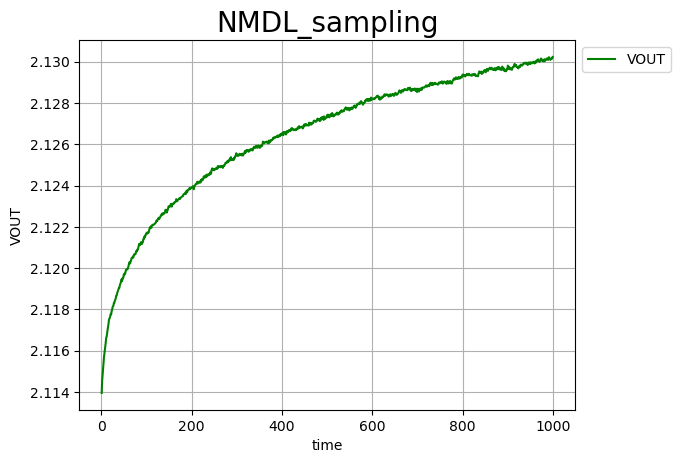

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('260206_NMDL_#6_WL_1010_R02_SAMPLING.csv', sep = ',')

df1 = df.iloc[1:,:]
df2 = df1[df1['VOUT']>1.9954]
df3 = df2[df2['@TIME']<530]

fig, ax = plt.subplots()


plt.plot(df2['@TIME'],df2['VOUT'],color = 'green',label = 'VOUT')

ax.set_title('NMDL_sampling',fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor = (1,1))
ax.set_xlabel('time')
ax.set_ylabel('VOUT')